In [1]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import os
import pandas as pd 
from keras.models import Model
from tensorflow.keras.layers import Input, Conv2D ,BatchNormalization
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense , UpSampling2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Conv2DTranspose, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import RMSprop,Adam

Loading data

In [2]:
training_images = []
training_groundTruth = []
validation_images = []
validation_groundTruth = []
test_images = []
test_groundTruth = []

path = "../input/isic2017-256x256-jpeg/ISIC_2017_256x256/train/images/images"
paths = os.listdir(path)
paths.sort()
for image in paths:
  img = cv2.imread(path + '/' + image)
  training_images.append(img)
    
path = "../input/isic2017-256x256-jpeg/ISIC_2017_256x256/train/masks/masks"
paths = os.listdir(path)
paths.sort()
for image in paths:
  img = cv2.imread(path + '/' + image)
  training_groundTruth.append(img)
    
path = "../input/isic2017-256x256-jpeg/ISIC_2017_256x256/valid/images/images"
paths = os.listdir(path)
paths.sort()
for image in paths:
  img = cv2.imread(path + '/' + image)
  validation_images.append(img)
    
path = "../input/isic2017-256x256-jpeg/ISIC_2017_256x256/valid/masks/masks"
paths = os.listdir(path)
paths.sort()
for image in paths:
  img = cv2.imread(path + '/' + image)
  validation_groundTruth.append(img)
    
path = "../input/isic2017-256x256-jpeg/ISIC_2017_256x256/test/images/images"
paths = os.listdir(path)
paths.sort()
for image in paths:
  img = cv2.imread(path + '/' + image)
  test_images.append(img)
    
path = "../input/isic2017-256x256-jpeg/ISIC_2017_256x256/test/masks/masks"
paths = os.listdir(path)
paths.sort()
for image in paths:
  img = cv2.imread(path + '/' + image)
  test_groundTruth.append(img)

In [3]:
training_images = np.array(training_images)
training_groundTruth = np.array(training_groundTruth)
validation_images = np.array(validation_images)
validation_groundTruth = np.array(validation_groundTruth)
test_images = np.array(test_images)
test_groundTruth = np.array(test_groundTruth)
training_images.sort()
training_groundTruth.sort()
input_shape = training_images[0].shape
print(input_shape)
print(training_groundTruth.shape)

(256, 256, 3)
(2000, 256, 256, 3)


Image samples

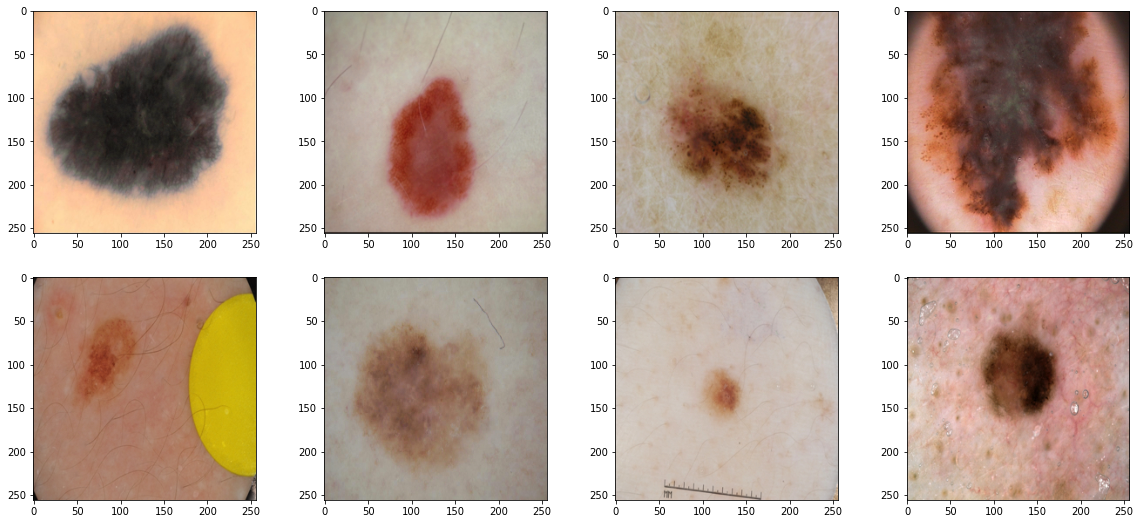

In [4]:
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(cv2.cvtColor(training_images[0], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,2)
plt.imshow(cv2.cvtColor(training_images[55], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,3)
plt.imshow(cv2.cvtColor(training_images[130], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,4)
plt.imshow(cv2.cvtColor(training_images[255], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,5)
plt.imshow(cv2.cvtColor(training_images[512], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,6)
plt.imshow(cv2.cvtColor(training_images[1024], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,7)
plt.imshow(cv2.cvtColor(training_images[1350], cv2.COLOR_BGR2RGB))
plt.subplot(2,4,8)
plt.imshow(cv2.cvtColor(training_images[1890], cv2.COLOR_BGR2RGB))
plt.show()

Image masks

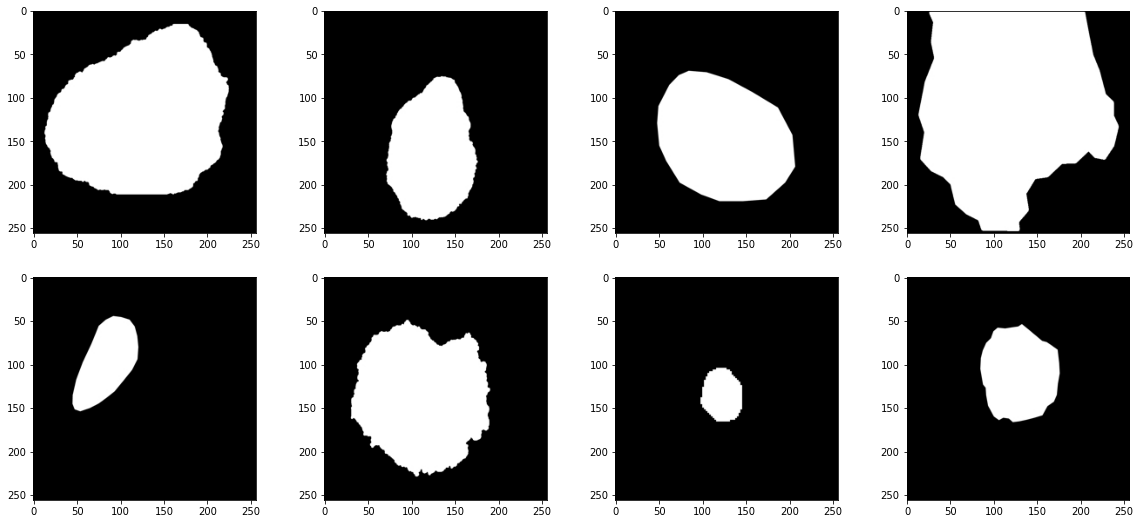

In [5]:
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(training_groundTruth[0], cmap = plt.cm.binary_r)
plt.subplot(2,4,2)
plt.imshow(training_groundTruth[55], cmap = plt.cm.binary_r)
plt.subplot(2,4,3)
plt.imshow(training_groundTruth[130], cmap = plt.cm.binary_r)
plt.subplot(2,4,4)
plt.imshow(training_groundTruth[255], cmap = plt.cm.binary_r)
plt.subplot(2,4,5)
plt.imshow(training_groundTruth[512], cmap = plt.cm.binary_r)
plt.subplot(2,4,6)
plt.imshow(training_groundTruth[1024], cmap = plt.cm.binary_r)
plt.subplot(2,4,7)
plt.imshow(training_groundTruth[1350], cmap = plt.cm.binary_r)
plt.subplot(2,4,8)
plt.imshow(training_groundTruth[1890], cmap = plt.cm.binary_r)
plt.show()

In [6]:
model = VGG16()
model.summary()

2022-01-30 19:55:09.958941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-30 19:55:10.077616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-30 19:55:10.078279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-30 19:55:10.079400: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

553476096/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [7]:
new_input = keras.Input(shape=input_shape)
vgg = VGG16(include_top=False, input_tensor=new_input, classes=2)
output = vgg.layers[-1].output
# output = keras.layers.Flatten()(output)
vgg = Model(vgg.input, output)
for layer in vgg.layers:
   layer.trainable = False
vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

In [37]:
model = Sequential()
model.add(vgg)
model.add(Conv2D(filters=512, kernel_size=(1,1),activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(1,1),activation="relu"))
model.add(Conv2D(filters=2, kernel_size=(1,1),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2DTranspose(filters=3,padding='same', kernel_size=(64,64),strides=(32,32) ,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 512)         262656    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 512)         262656    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 2)           1026      
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 8, 2)           8         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 256, 256, 3)       24579     
Total params: 15,265,613
Trainable params: 550,921
Non-trainable params: 14,714,692
____________________________________

In [9]:
from keras import backend as K

def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac)

def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

# def jacc_loss(y_true, y_pred):
#      return 1-iou_score(y_true, y_pred)


def iou_score(gt, pr):
   
    smooth=1e-5
    # score calculation
    intersection = K.sum(gt * pr)
    union = K.sum(gt + pr) - intersection

    score = (intersection + smooth) / (union + smooth)

    return score


In [38]:
model.compile(loss=[jaccard_distance],
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=[iou])

In [39]:
result = model.fit(training_images,training_groundTruth.astype(np.float32),
                    validation_data=(validation_images, validation_groundTruth.astype(np.float32)),
                    batch_size=24,
                    epochs=100,
                    verbose=1)

Epoch 1/100
84/84 [==============================] - 8s 89ms/step - loss: 0.2016 - iou: 0.7984 - val_loss: 0.1805 - val_iou: 0.8195
Epoch 2/100
84/84 [==============================] - 7s 84ms/step - loss: 0.2001 - iou: 0.7999 - val_loss: 0.1790 - val_iou: 0.8210
Epoch 3/100
84/84 [==============================] - 7s 84ms/step - loss: 0.1985 - iou: 0.8015 - val_loss: 0.1770 - val_iou: 0.8230
Epoch 4/100
84/84 [==============================] - 7s 84ms/step - loss: 0.1975 - iou: 0.8025 - val_loss: 0.1763 - val_iou: 0.8237
Epoch 5/100
84/84 [==============================] - 7s 84ms/step - loss: 0.1969 - iou: 0.8031 - val_loss: 0.1760 - val_iou: 0.8240
Epoch 6/100
84/84 [==============================] - 7s 85ms/step - loss: 0.1966 - iou: 0.8034 - val_loss: 0.1759 - val_iou: 0.8241
Epoch 7/100
84/84 [==============================] - 7s 84ms/step - loss: 0.1965 - iou: 0.8035 - val_loss: 0.1758 - val_iou: 0.8242
Epoch 8/100
84/84 [==============================] - 7s 84ms/step - loss: 0.

stats for 100 epochs

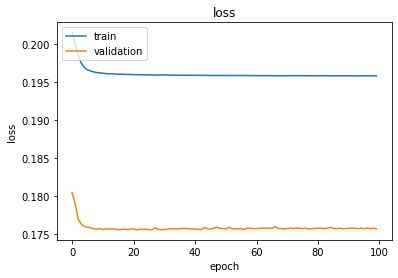

84/84 [==============================] - 6s 73ms/step - loss: 0.1958 - iou: 0.8042
____________stats on training____________
IOU:       |   80.42  |
Loss:      |   19.58  |
7/7 [==============================] - 1s 70ms/step - loss: 0.1757 - iou: 0.8243
____________stats on validation____________
IOU:       |   82.43  |
Loss:      |   17.57  |
25/25 [==============================] - 2s 74ms/step - loss: 0.2402 - iou: 0.7598
____________stats on test____________
IOU:       |   75.98  |
Loss:      |   24.02  |


In [46]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


res = model.evaluate(training_images, training_groundTruth.astype(np.float32), batch_size= 24)
print('____________stats on training____________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))

res = model.evaluate(validation_images, validation_groundTruth.astype(np.float32), batch_size= 24)
print('____________stats on validation____________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))

res = model.evaluate(test_images, test_groundTruth.astype(np.float32), batch_size= 24)
print('____________stats on test____________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))




prediction samples

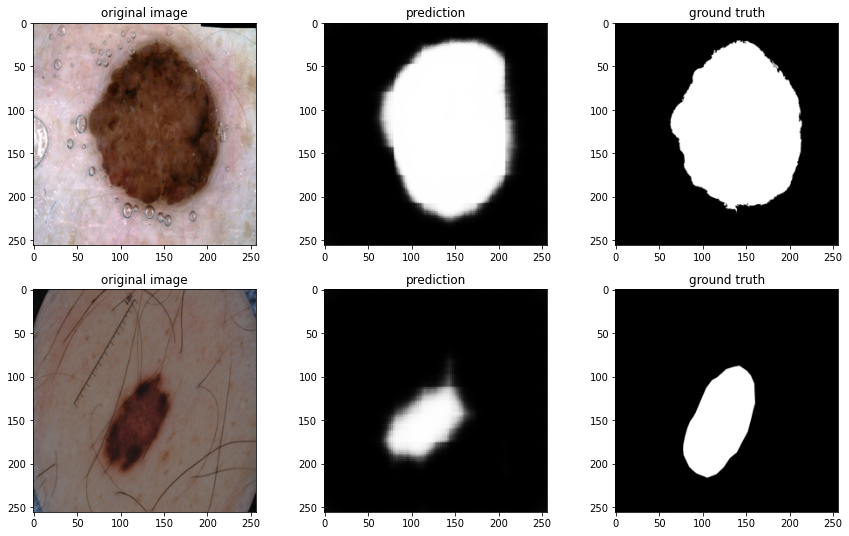

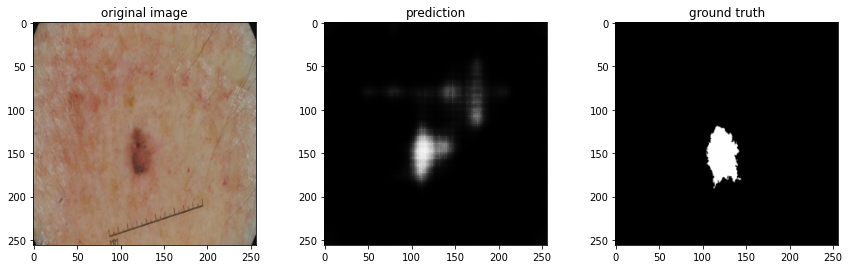

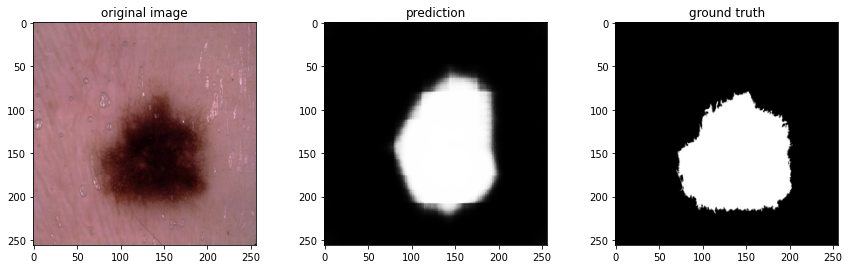

(600, 256, 256, 3)


In [42]:
idx1=470
idx2=1
idx3=170
idx4=244
prediction = np.array(model.predict(test_images))
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(cv2.cvtColor(test_images[idx1], cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.subplot(2,4,2)
plt.imshow(prediction[idx1], plt.cm.binary_r)
plt.title("prediction")
plt.subplot(2,4,3)
plt.imshow(cv2.cvtColor(test_groundTruth[idx1], cv2.COLOR_BGR2RGB))
plt.title("ground truth")
plt.subplot(2,4,5)
plt.imshow(cv2.cvtColor(test_images[idx2], cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.subplot(2,4,6)
plt.imshow(prediction[idx2], plt.cm.binary_r)
plt.title("prediction")
plt.subplot(2,4,7)
plt.imshow(cv2.cvtColor(test_groundTruth[idx2], cv2.COLOR_BGR2RGB))
plt.title("ground truth")
plt.show()
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(cv2.cvtColor(test_images[idx3], cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.subplot(2,4,2)
plt.imshow(prediction[idx3], plt.cm.binary_r)
plt.title("prediction")
plt.subplot(2,4,3)
plt.imshow(cv2.cvtColor(test_groundTruth[idx3], cv2.COLOR_BGR2RGB))
plt.title("ground truth")
plt.figure(figsize=(20,9))
plt.subplot(2,4,5)
plt.imshow(cv2.cvtColor(test_images[idx4], cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.subplot(2,4,6)
plt.imshow(prediction[idx4], plt.cm.binary_r)
plt.title("prediction")
plt.subplot(2,4,7)
plt.imshow(cv2.cvtColor(test_groundTruth[idx4], cv2.COLOR_BGR2RGB))
plt.title("ground truth")
plt.show()
print(np.shape(prediction))